<a href="https://colab.research.google.com/github/AliaksandrSiarohin/first-order-model/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo for MyQLaNet

**Clone repository**

In [1]:
!git clone https://github.com/reshalfahsi/myqlanet

Cloning into 'myqlanet'...
remote: Enumerating objects: 450, done.
remote: Counting objects: 100% (450/450), done.
remote: Compressing objects: 100% (287/287), done.
remote: Total 450 (delta 304), reused 303 (delta 157), pack-reused 0
Receiving objects: 100% (450/450), 291.75 KiB | 7.88 MiB/s, done.
Resolving deltas: 100% (304/304), done.


In [2]:
%cd /content/myqlanet

/content/myqlanet


**Mount your Google drive folder on Colab**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Demo time!**

Train the Model

In [ ]:
from myqlanet import *

# path to the important config file
dataset_path = '/content/gdrive/My Drive/macula_dataset'
annotation_path = '/content/gdrive/My Drive/macula_dataset/annotation.csv'
weight_path = '/content/gdrive/My Drive/macula_dataset/weight.pth'

# create MyQLaNet model
model = MyQLaNet()

# create dataset
dataset = MaculaDataset(annotation_path, dataset_path)

# training time!
model.compile(dataset)
model.fit(weight_path)

Test the Model

=> loading checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' ...
=> loaded checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' (trained for 48 epochs)


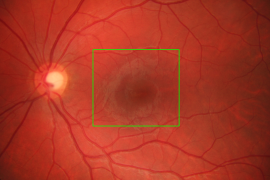

=> loading checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' ...
=> loaded checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' (trained for 48 epochs)


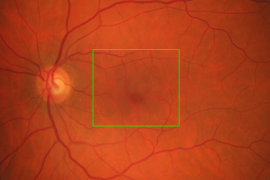

=> loading checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' ...
=> loaded checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' (trained for 48 epochs)


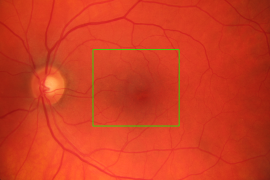

=> loading checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' ...
=> loaded checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' (trained for 48 epochs)


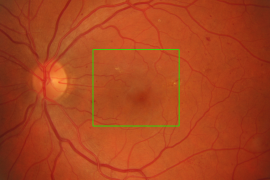

=> loading checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' ...
=> loaded checkpoint '/content/gdrive/My Drive/macula_dataset/weight.pth' (trained for 48 epochs)


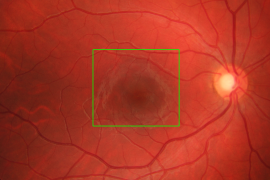

In [4]:
from myqlanet import *
import os
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

model = MyQLaNet()

dataset_path = '/content/gdrive/My Drive/macula_dataset'
weight_path = '/content/gdrive/My Drive/macula_dataset/weight.pth'

images = []
filenames = []
for filename in os.listdir(dataset_path):
    if '.jpg' in filename:
      img = cv2.imread(os.path.join(dataset_path,filename))
      if img is not None:
        filenames.append(filename)
        images.append(img)

name2img = {}
for idx, name in enumerate(filenames):
    name2img[name] = images[idx]

crop = CropImage()
resize = ResizeImage()

start = int(np.random.random() * (len(filenames) - 1))
filenames = filenames[start:start+5]

for filename in filenames:
  
  path = os.path.join(dataset_path,filename)
  result = model.predict(weight_path, path)

  img = name2img[filename]
  
  img = crop.run(img)
  resize.process(img, VALID_IMAGE_SIZE)
  img = resize.getResult()
  
  start_point = (int(result[3]), int(result[2]))
  end_point = (int(result[1]), int(result[0]))
            
  color = (0, 255, 0)
  thickness = 5
  img = cv2.rectangle(img, start_point, end_point, color, thickness)
  
  resize.process(img, (270,180))
  img = resize.getResult()
  
  cv2_imshow(img)